# Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
summary_filename = 'data/gombe_128.csv'
ratings_filename = 'data/gombe_460.csv'
sumdf = pd.read_csv(summary_filename)
ratdf = pd.read_csv(ratings_filename)

In [3]:
impl = sumdf.impl
print('a)The median impulsiveness score is {:.2f}'.format(impl.median()))

a)The median impulsiveness score is 3.33


In [4]:
chimcode_dig =sumdf.chimpcode[sumdf.chimpcode.str.contains(r'\d{3}.*')]
print('b)The number of chimpanzees with 3 digits in their code is {}'.format(len(chimcode_dig)))

b)The number of chimpanzees with 3 digits in their code is 107


In [5]:
avg_diff_decs_conv = abs((sumdf['conv']-sumdf['decs']).mean())
print('c) The average difference between conventional and decisive traits is {:.3f}'.format(avg_diff_decs_conv))


c) The average difference between conventional and decisive traits is 1.259


In [6]:
grouped_by_sex = sumdf.groupby(['sex']).mean()
prominence = grouped_by_sex[grouped_by_sex.columns[-6:]].copy()
print('d)The most prominent trait for each {0} {1} '.format(prominence.idxmax(axis=1), prominence.max(axis=1)))


d)The most prominent trait for each sex
0    conscientiousness
1         extraversion
dtype: object sex
0    4.691202
1    4.890041
dtype: float64 


In [95]:
correlation = sumdf[sumdf.columns[-6:]].corr()
#get the max value of the upper triangular matrix
corr_max = correlation.values[np.triu_indices_from(correlation.values,1)]
print('e)The most correlated pair is openness and extraversion with correlation {}'.format(corr_max.max()))
correlation

e)The most correlated pair is openness and extraversion with correlation 0.46811472360429457


,dominance,extraversion,conscientiousness,agreeableness,neuroticism,openness
dominance,1.000000,0.136440,-0.418756,0.293900,0.394270,0.414217
extraversion,0.136440,1.000000,-0.143216,0.181809,0.188450,0.468115
conscientiousness,-0.418756,-0.143216,1.000000,-0.023491,-0.416410,-0.494661
agreeableness,0.293900,0.181809,-0.023491,1.000000,-0.015866,0.418662
neuroticism,0.394270,0.188450,-0.416410,-0.015866,1.000000,0.404803
openness,0.414217,0.468115,-0.494661,0.418662,0.404803,1.000000


In [8]:
tmp= sumdf.loc[: ,'dom':'innov'].set_index(sumdf['chimpcode'])
sympdf= tmp.loc[tmp['symp']==tmp.max(axis=1)]
print('f:')
sympdf

f:


,dom,sol,impl,symp,stbl,invt,depd,soc,thotl,help,...,reckl,sens,unem,cur,vuln,actv,pred,conv,cool,innov
chimpcode,,,,,,,,,,,,,,,,,,,,,
E131,2.428571,3.857143,3.000000,5.571429,4.285714,4.142857,4.285714,4.571429,1.857143,5.000000,...,2.000000,4.571429,2.714286,3.142857,3.000000,5.000000,3.428571,4.285714,5.285714,4.000000
Q450,1.888889,4.666667,3.555556,5.777778,4.111111,4.222222,3.666667,4.666667,2.666667,4.888889,...,2.444444,4.777778,3.777778,3.777778,4.555556,5.111111,3.555556,3.888889,4.333333,3.222222
Z329,1.333333,3.333333,1.840232,6.666667,4.333333,4.000000,5.000000,3.666667,1.333333,5.333333,...,1.666667,2.333333,4.666667,1.666667,3.333333,3.333333,3.000000,2.000000,6.333333,3.333333
D191,4.750000,3.250000,4.250000,6.750000,6.500000,6.250000,6.000000,5.250000,3.750000,6.750000,...,3.250000,5.750000,4.250000,4.250000,3.000000,4.250000,5.000000,3.500000,5.500000,6.000000
W10,2.000000,2.000000,1.666667,5.000000,2.333333,2.333333,4.000000,4.333333,4.333333,3.666667,...,2.000000,2.333333,2.333333,2.666667,1.666667,2.000000,3.333333,2.000000,3.666667,3.666667
A412,2.666667,3.666667,1.666667,5.333333,3.333333,3.666667,3.000000,4.000000,2.000000,3.333333,...,1.333333,4.666667,5.333333,2.000000,3.666667,3.000000,5.000000,3.333333,5.000000,3.000000
P325,2.666667,3.000000,3.000000,6.000000,3.000000,4.000000,3.333333,3.333333,3.666667,4.333333,...,5.333333,3.666667,4.000000,3.666667,2.333333,3.666667,3.666667,2.333333,3.333333,5.333333
C154,2.333333,2.333333,2.666667,6.000000,3.333333,1.666667,5.666667,6.000000,4.000000,6.000000,...,3.666667,2.000000,3.666667,3.333333,4.000000,4.000000,4.333333,3.666667,4.333333,4.333333
R81,1.333333,4.333333,3.333333,5.000000,3.666667,3.000000,3.666667,4.666667,3.000000,4.666667,...,2.666667,4.000000,4.000000,4.333333,2.666667,4.196078,4.333333,4.000000,3.666667,3.000000


In [9]:
stacked = pd.DataFrame(data = tmp.stack(), columns=['score'])
stacked = stacked.reset_index()
stacked = stacked.set_index('chimpcode')
stacked.columns = ['traits', 'score']
print('e)')
stacked


e)


,traits,score
chimpcode,,
E131,dom,2.428571
E131,sol,3.857143
E131,impl,3.000000
E131,symp,5.571429
E131,stbl,4.285714
E131,invt,4.142857
E131,depd,4.285714
E131,soc,4.571429
E131,thotl,1.857143


In [10]:
#tmp.dot(tmp.T)
from scipy.spatial.distance import pdist
from itertools import combinations 
s = pd.Series(pdist(tmp, 'euclidean'),
                        index=pd.MultiIndex.from_tuples(tuple(combinations(tmp.index, 2))))

print('h) The chimps with the most similar traits are {0} with distance {1}'.format(s.idxmin(), s[s.idxmin()]))


h) The chimps with the most similar traits are ('Q217', 'D224') with distance 2.285218200619898


In [11]:
print('i) The number of different raters is {}'.format(len(ratdf.ratercode.unique())))


i) The number of different raters is 18


In [12]:
raters = ratdf.loc[:, 'chimpcode':'ratercode'].groupby(['ratercode']).count()
print('j) The rater with the most rates is {0} with {1} rates'.format(list(raters.idxmax()), list(raters.max())))

j) The rater with the most rates is ['G'] with [35] rates


In [13]:
print('k) The year on which the oldest chimpanzee was born is {}'.format(ratdf['chimp_YOB'].min()))


k) The year on which the oldest chimpanzee was born is 1919


In [14]:
d= ratdf[['chimpcode','ratercode']].groupby('chimpcode').count()
ratcntdf = pd.DataFrame(d)
ratcntdf = ratcntdf.reset_index()
ratcntdf.columns= ['chimpcode', 'raters']
print('l)')
ratcntdf

l)


,chimpcode,raters
0,A100,3
1,A341,5
2,A364,3
3,A383,3
4,A412,3
5,B24,3
6,B396,3
7,B89,3
8,C133,3
9,C141,2


In [15]:
chimps_merged = pd.merge(ratcntdf, sumdf, how='left', on='chimpcode')
print('m)')
chimps_merged

m)


,chimpcode,raters,sex,kasekela,dom,sol,impl,symp,stbl,invt,...,pred,conv,cool,innov,dominance,extraversion,conscientiousness,agreeableness,neuroticism,openness
0,A100,3,0,1.000000,1.666667,5.666667,3.333333,4.000000,3.666667,3.333333,...,3.000000,3.000000,4.666667,4.333333,3.666667,3.500000,4.777778,3.555556,3.000000,2.750000
1,A341,5,1,0.000000,6.400000,4.000000,4.400000,5.400000,4.800000,6.200000,...,3.400000,2.600000,5.200000,5.200000,5.866667,4.599455,4.200000,6.000000,4.800000,5.550000
2,A364,3,0,0.000000,1.666667,1.333333,2.000000,2.666667,4.666667,3.333333,...,4.000000,3.000000,4.333333,4.666667,3.777778,5.166667,5.222222,3.666667,3.333333,3.750000
3,A383,3,1,1.000000,3.666667,1.666667,6.333333,4.000000,4.000000,6.000000,...,3.333333,4.333333,4.666667,6.333333,3.888889,5.416667,2.888889,5.000000,4.833333,6.166667
4,A412,3,0,1.000000,2.666667,3.666667,1.666667,5.333333,3.333333,3.666667,...,5.000000,3.333333,5.000000,3.000000,3.444444,4.083333,6.000000,4.444444,3.166667,2.583333
5,B24,3,1,1.000000,2.666667,5.000000,3.000000,6.333333,5.000000,3.000000,...,5.333333,3.666667,4.000000,3.333333,4.666667,4.333333,5.222222,5.777778,3.333333,3.583333
6,B396,3,0,1.000000,2.333333,4.333333,1.666667,5.333333,4.333333,3.666667,...,1.666667,4.000000,5.666667,3.666667,4.777778,4.250000,4.888889,5.333333,2.833333,3.416667
7,B89,3,0,1.000000,3.000000,4.666667,3.000000,4.333333,2.666667,3.000000,...,3.666667,3.333333,5.333333,5.333333,3.333333,4.250000,4.555556,4.111111,4.166667,3.833333
8,C133,3,0,1.000000,2.666667,1.333333,5.000000,4.000000,4.333333,4.666667,...,3.333333,3.333333,6.333333,6.333333,3.111111,5.750000,3.444444,4.555556,3.333333,5.500000
9,C141,2,1,1.000000,3.500000,4.000000,3.000000,5.000000,3.000000,2.500000,...,3.000000,2.500000,6.500000,7.000000,3.333333,4.625000,4.666667,4.333333,4.000000,4.125000


# Question 2 

In [16]:
import json
yelp_file = 'data/yelp_academic_dataset_business.json'
business_records = [json.loads(line) for line in open(yelp_file)]
yelpdf = pd.DataFrame(business_records)
yelpdf

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Parking': {'lot': True, 'street': False, 'va...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Wednesday': {'open': '11:00', 'close': '18:0...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business
1,"{'Parking': {'lot': False, 'street': False, 'v...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business
2,"{'Parking': {'lot': True, 'street': False, 'va...",7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Wednesday': {'open': '10:00', 'close': '21:0...",33.383123,-111.964485,Forever 21,[],True,7,3.5,AZ,business
3,{},gjxoKVsRJwEoa8zd9XxlAw,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,"912 W Sycamore Pl\nChandler, AZ 85225","{'Wednesday': {'open': '06:00', 'close': '19:0...",33.356472,-111.857818,Loving Hands Pet Care,[],True,4,5.0,AZ,business
4,{},V28yjMqyZnbCtabroJN_aA,"[Veterinarians, Pets]",Phoenix,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},33.538493,-112.097232,Amec Mid-City Animal Hospital,[],True,3,5.0,AZ,business
5,"{'Good for Kids': True, 'Good For': {'dinner':...",ShUDf64NVkwCe8izdUbYuw,"[Mexican, Restaurants]",Phoenix,"5820 W McDowell Rd\nPhoenix, AZ 85035","{'Wednesday': {'open': '06:00', 'close': '06:0...",33.466373,-112.184772,Los Armandos Asadero Y Mariscos,[],True,3,5.0,AZ,business
6,{'Accepts Credit Cards': False},-orgn4aQoie80CiWcoqkqg,"[Real Estate Services, Property Management, Ho...",Scottsdale,"7525 E Camelback Road\nScottsdale, AZ 85251",{},33.502459,-111.919222,Clayton Companies,[],False,3,5.0,AZ,business
7,"{'Parking': {'lot': True, 'street': False, 'va...",mQfT3JYu18HN22DVylcE7A,"[Bakeries, Food, Breakfast & Brunch, Sandwiche...",Phoenix,"3134 E Indian School Rd\nPhoenix, AZ 85018","{'Wednesday': {'open': '07:30', 'close': '15:3...",33.495216,-112.014454,Bertha's Café,[],True,177,4.5,AZ,business
8,"{'Parking': {'lot': True, 'street': False, 'va...",cqXv3w9Mf-aVi4PPRspfFQ,"[Art Supplies, Shopping, Framing, Arts & Crafts]",Tempe,"4421 S Rural Rd\nTempe, AZ 85282","{'Wednesday': {'open': '10:00', 'close': '19:0...",33.384050,-111.926310,Jerry's Artarama,[],True,21,4.0,AZ,business
9,{'Good for Kids': True},C2FC_hsVG4rupRESeUnrcA,"[Active Life, Massage Therapy, Health & Medica...",Cave Creek,"Cave Creek, AZ 85331",{},33.833372,-111.950704,Shauna Brown Fitness,[],True,5,5.0,AZ,business


In [17]:
print('a) There are {} Starbucks'.format(list(yelpdf[['name']].loc[yelpdf.name=='Starbucks'].count())))

a) There are [83] Starbucks


In [18]:
zipless = list(yelpdf[['full_address']].loc[yelpdf.full_address.str.contains(r'.*(\d{5})$')==False].count())
print('b) There are {} addresses without zip codes'
      .format(zipless))

b) There are [64] addresses without zip codes


/home/vasia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [19]:
yelpdf

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Parking': {'lot': True, 'street': False, 'va...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Wednesday': {'open': '11:00', 'close': '18:0...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business
1,"{'Parking': {'lot': False, 'street': False, 'v...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business
2,"{'Parking': {'lot': True, 'street': False, 'va...",7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Wednesday': {'open': '10:00', 'close': '21:0...",33.383123,-111.964485,Forever 21,[],True,7,3.5,AZ,business
3,{},gjxoKVsRJwEoa8zd9XxlAw,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,"912 W Sycamore Pl\nChandler, AZ 85225","{'Wednesday': {'open': '06:00', 'close': '19:0...",33.356472,-111.857818,Loving Hands Pet Care,[],True,4,5.0,AZ,business
4,{},V28yjMqyZnbCtabroJN_aA,"[Veterinarians, Pets]",Phoenix,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},33.538493,-112.097232,Amec Mid-City Animal Hospital,[],True,3,5.0,AZ,business
5,"{'Good for Kids': True, 'Good For': {'dinner':...",ShUDf64NVkwCe8izdUbYuw,"[Mexican, Restaurants]",Phoenix,"5820 W McDowell Rd\nPhoenix, AZ 85035","{'Wednesday': {'open': '06:00', 'close': '06:0...",33.466373,-112.184772,Los Armandos Asadero Y Mariscos,[],True,3,5.0,AZ,business
6,{'Accepts Credit Cards': False},-orgn4aQoie80CiWcoqkqg,"[Real Estate Services, Property Management, Ho...",Scottsdale,"7525 E Camelback Road\nScottsdale, AZ 85251",{},33.502459,-111.919222,Clayton Companies,[],False,3,5.0,AZ,business
7,"{'Parking': {'lot': True, 'street': False, 'va...",mQfT3JYu18HN22DVylcE7A,"[Bakeries, Food, Breakfast & Brunch, Sandwiche...",Phoenix,"3134 E Indian School Rd\nPhoenix, AZ 85018","{'Wednesday': {'open': '07:30', 'close': '15:3...",33.495216,-112.014454,Bertha's Café,[],True,177,4.5,AZ,business
8,"{'Parking': {'lot': True, 'street': False, 'va...",cqXv3w9Mf-aVi4PPRspfFQ,"[Art Supplies, Shopping, Framing, Arts & Crafts]",Tempe,"4421 S Rural Rd\nTempe, AZ 85282","{'Wednesday': {'open': '10:00', 'close': '19:0...",33.384050,-111.926310,Jerry's Artarama,[],True,21,4.0,AZ,business
9,{'Good for Kids': True},C2FC_hsVG4rupRESeUnrcA,"[Active Life, Massage Therapy, Health & Medica...",Cave Creek,"Cave Creek, AZ 85331",{},33.833372,-111.950704,Shauna Brown Fitness,[],True,5,5.0,AZ,business


In [20]:
to_drop = yelpdf.full_address[yelpdf.full_address.str.contains(r'.*(\d{5})$')==False]
yelpdf = yelpdf.drop(to_drop.index)
zip_code = yelpdf.full_address.str.extract(r'.*(\d{5})$')
yelpdf['zip_code'] = zip_code
print('c)')
yelpdf

/home/vasia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/home/vasia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


c)


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,zip_code
0,"{'Parking': {'lot': True, 'street': False, 'va...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Wednesday': {'open': '11:00', 'close': '18:0...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business,85023
1,"{'Parking': {'lot': False, 'street': False, 'v...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business,85308
2,"{'Parking': {'lot': True, 'street': False, 'va...",7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Wednesday': {'open': '10:00', 'close': '21:0...",33.383123,-111.964485,Forever 21,[],True,7,3.5,AZ,business,85282
3,{},gjxoKVsRJwEoa8zd9XxlAw,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,"912 W Sycamore Pl\nChandler, AZ 85225","{'Wednesday': {'open': '06:00', 'close': '19:0...",33.356472,-111.857818,Loving Hands Pet Care,[],True,4,5.0,AZ,business,85225
4,{},V28yjMqyZnbCtabroJN_aA,"[Veterinarians, Pets]",Phoenix,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},33.538493,-112.097232,Amec Mid-City Animal Hospital,[],True,3,5.0,AZ,business,85021
5,"{'Good for Kids': True, 'Good For': {'dinner':...",ShUDf64NVkwCe8izdUbYuw,"[Mexican, Restaurants]",Phoenix,"5820 W McDowell Rd\nPhoenix, AZ 85035","{'Wednesday': {'open': '06:00', 'close': '06:0...",33.466373,-112.184772,Los Armandos Asadero Y Mariscos,[],True,3,5.0,AZ,business,85035
6,{'Accepts Credit Cards': False},-orgn4aQoie80CiWcoqkqg,"[Real Estate Services, Property Management, Ho...",Scottsdale,"7525 E Camelback Road\nScottsdale, AZ 85251",{},33.502459,-111.919222,Clayton Companies,[],False,3,5.0,AZ,business,85251
7,"{'Parking': {'lot': True, 'street': False, 'va...",mQfT3JYu18HN22DVylcE7A,"[Bakeries, Food, Breakfast & Brunch, Sandwiche...",Phoenix,"3134 E Indian School Rd\nPhoenix, AZ 85018","{'Wednesday': {'open': '07:30', 'close': '15:3...",33.495216,-112.014454,Bertha's Café,[],True,177,4.5,AZ,business,85018
8,"{'Parking': {'lot': True, 'street': False, 'va...",cqXv3w9Mf-aVi4PPRspfFQ,"[Art Supplies, Shopping, Framing, Arts & Crafts]",Tempe,"4421 S Rural Rd\nTempe, AZ 85282","{'Wednesday': {'open': '10:00', 'close': '19:0...",33.384050,-111.926310,Jerry's Artarama,[],True,21,4.0,AZ,business,85282
9,{'Good for Kids': True},C2FC_hsVG4rupRESeUnrcA,"[Active Life, Massage Therapy, Health & Medica...",Cave Creek,"Cave Creek, AZ 85331",{},33.833372,-111.950704,Shauna Brown Fitness,[],True,5,5.0,AZ,business,85331


In [21]:
hierarc_yelpdf = yelpdf.set_index(['city', 'zip_code', 'business_id'])
hierarc_yelpdf = hierarc_yelpdf.sort_index(level=['city', 'zip_code', 'business_id'])
print('d)')
hierarc_yelpdf

d)


attributes  \
city       zip_code business_id                                                                 
Ahwatukee  85044    LNdwp-9Isnd6xmBKUz4K_A  {'Parking': {'lot': False, 'street': False, 'v...   
                    Our6bzte5W1wlIeOu9luug  {'Good For': {'dinner': True, 'brunch': False,...   
                    bkkkASIzZYAF0jTip562wg                      {'By Appointment Only': True}   
           85048    -tGrdYQlmuxhvKjQXScA5Q                     {'Accepts Credit Cards': True}   
                    7VLW-cIDaiO4Dx8gXYkZcg  {'Parking': {'lot': True, 'street': False, 'va...   
                    mIwUMSp_I5zHp1kvmxNoIA                     {'Accepts Credit Cards': True}   
Anthem     85086    -ZUEwUytc63ZWvgXJz7gHQ  {'Parking': {'lot': False, 'street': False, 'v...   
                    1MaS2GcEQY-VF22kjcqtpg                     {'Accepts Credit Cards': True}   
                    1f0g466Geu4nDdJhYQ_Vhg  {'Parking': {'lot': True, 'street': False, 'va...   
                    70cGielXC6w9DI8b9UPDxQ                                                 {}   
                    7AuLHR6_cO772Zwwn_w7kA                     {'Accepts Credit Cards': True}   
                    CcIJKgrjOv8mIEn-a7M5vw  {'Parking': {'lot': False, 'street': False, 'v...   
                    CuvAptYhNLba_RPArllsog   {'Accepts Credit Cards': True, 'Price Range': 1}   
                    Hf_MFIPi7ZiIWDQodJMzwg  {'Parking': {'lot': False, 'street': False, 'v...   
                    HrTXmtWrsgmWnoqV5nbTGg  {'Parking': {'lot': False, 'street': False, 'v...   
                    IrZZOcsO8AvoRzwhrcdazA                                                 {}   
                    IsFQ32WyFS3WSoXjUJ1dcQ  {'Parking': {'lot': True, 'street': False, 'va...   
                    KU3Y8aya5dLYwzdvgSFpPg  {'Parking': {'lot': True, 'street': False, 'va...   
                    LHwSUFdk1LZzbhSNYwoslw  {'Parking': {'lot': False, 'street': False, 'v...   
                    LkKMpVp4O_CQYOsqn0k1IQ  {'Take-out': True, 'Good for Kids': True, 'Goo...   
                    NHBfYwGcQk5RUVCbnpWRsg                                                 {}   
                    Q-lzzaCl5-yD2KgZcXevjA  {'Parking': {'lot': True, 'street': False, 'va...   
                    T2dwEcI56dl4siKpOq7QsA  {'Parking': {'lot': False, 'street': False, 'v...   
                    Vh_xXB42CYfhEdelpDb1Ow  {'Dogs Allowed': False, 'Parking': {'lot': Tru...   
                    XJv7dUb5fMRaZAWVZjhtvw  {'Parking': {'lot': True, 'street': False, 'va...   
                    XqpUg6FZefOxiDF65viyzw  {'Parking': {'lot': True, 'street': False, 'va...   
                    Y0Ife2OJPs5QSL-7dyMF5Q  {'Parking': {'lot': True, 'street': False, 'va...   
                    Ypn1Q576eno8p-aIFF2Ucg                                                 {}   
                    _DfLxjCmnEYrdV6srvzybg  {'Parking': {'lot': False, 'street': False, 'v...   
                    bFmzWmaU6hBn4J0gzkiQGw  {'Parking': {'lot': True, 'street': False, 'va...   
...                                                                                       ...   
Wickenburg 85390    ZgT_GjPHjwzk7l04xU-u_A  {'Parking': {'lot': True, 'street': False, 'va...   
                    ZjpCTpG87cmd9agfpz-EaQ  {'Parking': {'lot': True, 'street': False, 'va...   
                    bmePFvYkAIa3FPIMfhDDMw  {'Parking': {'lot': False, 'street': False, 'v...   
                    cYhtaMEEumE59uUOCUaKrw  {'Attire': 'casual', 'Noise Level': 'quiet', '...   
                    dQQ4wVKoGZGpqo_SAxz_NQ  {'Parking': {'lot': False, 'street': False, 'v...   
                    dWQUSWSYyHzQI4Poe3VLzA                                                 {}   
                    daiQLjClgxQ2iv7iIsiNww                                                 {}   
                    gbj6dSr3NPtUABkpzztsew  {'Parking': {'lot': False, 'street': False, 'v...   
                    k41DURkrKj8_fSyRIxQtcA  {'Parking': {'lot': False, 'street': False, 'v...   
         

In [22]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

e)


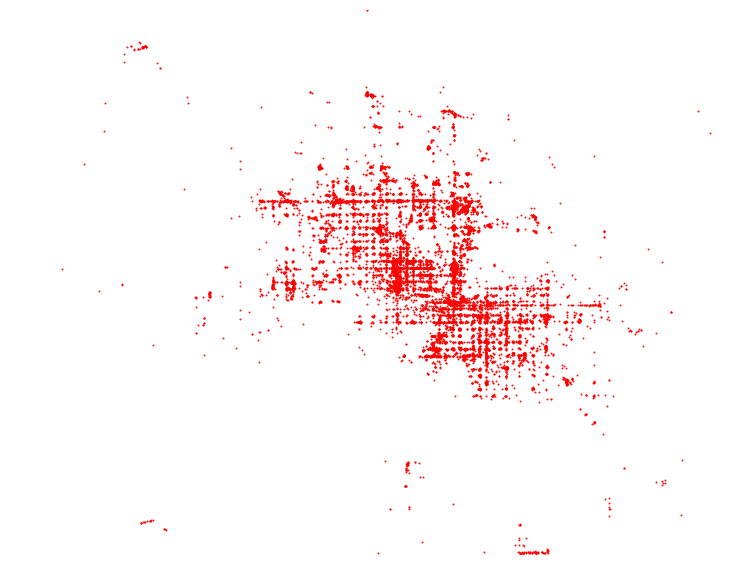

In [65]:
print('e)')
lat = yelpdf['latitude']
lng = yelpdf['longitude']
px, py = lat_lng_to_pixels(lat, lng)
plt.figure(figsize=(12, 10))
plt.axis('equal')
plt.xlim(min(px), max(px))
plt.ylim(min(py), max(py))
plt.axis('off')
plt.gca().set_facecolor('white')
plt.scatter(px, py, s=0.9, alpha=0.9, color='red')


In [25]:
unique_categories =[]
[unique_categories.extend(c) for c in yelpdf.categories]
print('f) The unique categories are {}'.format(len(set(unique_categories))))

f) The unique categories are 591


In [32]:
Glendale = yelpdf[(yelpdf.city == 'Glendale')&(yelpdf.categories.apply(lambda x: 'Bakeries' in x))]
print('g)The name of the bakery with the most reviews in Glendale is {}'
              .format(Glendale['name'].loc[Glendale['review_count'].idxmax()]))

g)The name of the bakery with the most reviews in Glendale is Paradise Bakery & Cafe


In [102]:
grouped = yelpdf[yelpdf.stars==5.0].groupby(yelpdf.city)['stars'].agg(['count'])
print('f)')
grouped.columns = ['# 5 star businesses']
grouped

f)


,# 5 star businesses
city,
Ahwatukee,1
Anthem,5
Apache Junction,14
Arcadia,1
Avondale,9
Buckeye,5
Carefree,6
Casa Grande,4
Cave Creek,19
